In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from mmcv.utils import collect_env

/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [3]:
import mmrotate
from mmrotate.datasets.builder import ROTATED_DATASETS
from mmrotate.datasets.dota import DOTADataset
print(mmrotate.__version__)

0.3.4


In [4]:
# Test mmrotate installation
!mim download mmrotate --config oriented_rcnn_r50_fpn_1x_dota_le90 --dest .

/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
processing oriented_rcnn_r50_fpn_1x_dota_le90...
oriented_rcnn_r50_fpn_1x_dota_le90-6d2b2ce0.pth exists in /gpfs/home/weitzk01
Successfully dumped oriented_rcnn_r50_fpn_1x_dota_le90.py to /gpfs/home/weitzk01


In [5]:
# Check MMDetection installation
import mmdet
print(mmdet.__version__)

2.28.2


In [6]:
# Check mmcv installation
import mmcv
from mmcv import Config
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

10.2
GCC 7.3


In [7]:
import torch
print(torch.__version__)

1.8.0


In [8]:
from mmcv.utils import collect_env
collect_env()

/bin/sh: gcc: command not found


{'sys.platform': 'linux',
 'Python': '3.8.13 (default, Mar 28 2022, 11:38:47) [GCC 7.5.0]',
 'CUDA available': True,
 'GPU 0': 'Tesla V100-SXM2-16GB',
 'CUDA_HOME': '/gpfs/share/apps/cuda/10.1.105',
 'NVCC': 'Cuda compilation tools, release 10.1, V10.1.10',
 'GCC': 'n/a',
 'PyTorch': '1.8.0',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) oneAPI Math Kernel Library Version 2021.4-Product Build 20210904 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v1.7.0 (Git Hash 7aed236906b1f7a05c0917e5257a1af05e9ff683)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 10.2\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_37,code=compute_37\n  - CuDNN 

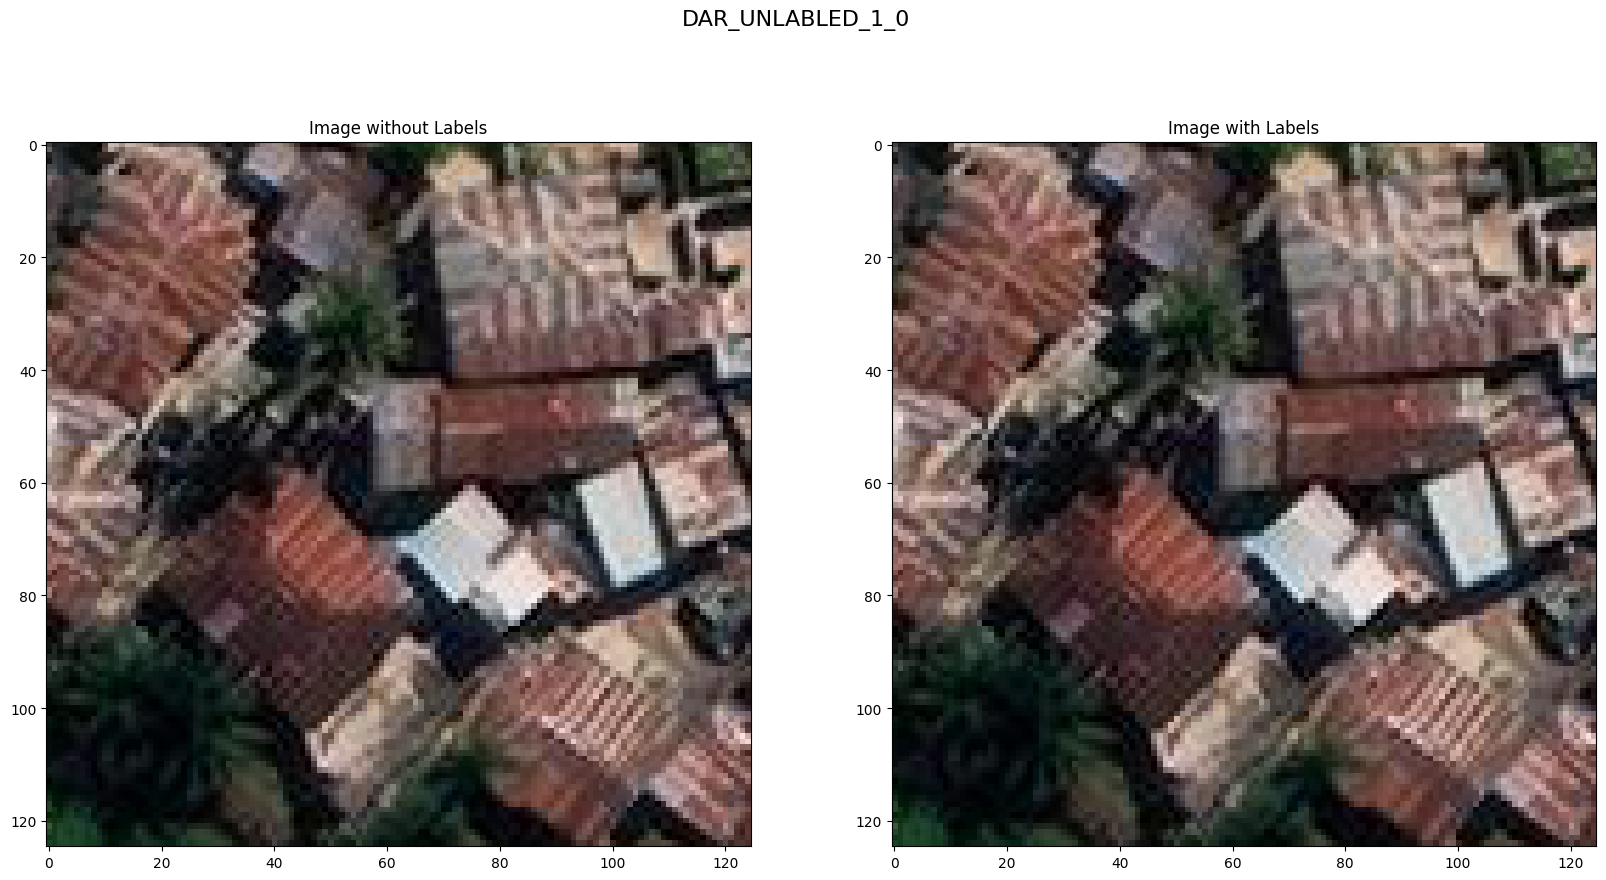

In [9]:
import matplotlib.pyplot as plt
import mmcv

image_name = 'DAR_UNLABLED_1_0'

# Load the image
img_path = f'/gpfs/home/weitzk01/satellite_mmrotate/images/{image_name}.png'
img = mmcv.imread(img_path)

# Load labels data (assuming img_labels is a DataFrame with x1, y1, x2, y2, ..., xn, yn columns)
# Replace this line with the actual loading of your labels data
img_labels = pd.read_csv(f'/gpfs/home/weitzk01/satellite_mmrotate/train/{image_name}.txt',
            sep=' ',
            names=['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'label', 'difficulty'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot image without labels on the first subplot
axes[0].imshow(mmcv.bgr2rgb(img))
axes[0].set_title('Image without Labels')

# Plot image with labels on the second subplot
axes[1].imshow(mmcv.bgr2rgb(img))
for index, row in img_labels.iterrows():
    x = row[['x1', 'x2', 'x3', 'x4', 'x1']]
    y = row[['y1', 'y2', 'y3', 'y4', 'y1']]
    axes[1].plot(x, y, '-', color='red')
    axes[1].plot(x, y, 'o', color='red')
axes[1].set_title('Image with Labels')

plt.suptitle(image_name, fontsize=16)

# Show the subplots
plt.show()

In [10]:
@ROTATED_DATASETS.register_module()
class SatteliteDataset(DOTADataset):
    """Grave dataset for detection."""
    CLASSES = ('grave',)

In [11]:
# We use mim to download the pre-trained checkpoints for inference and finetuning.
!mim download mmrotate --config oriented_rcnn_r50_fpn_1x_dota_le90 --dest .

/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
processing oriented_rcnn_r50_fpn_1x_dota_le90...
oriented_rcnn_r50_fpn_1x_dota_le90-6d2b2ce0.pth exists in /gpfs/home/weitzk01
Successfully dumped oriented_rcnn_r50_fpn_1x_dota_le90.py to /gpfs/home/weitzk01


In [12]:
from mmcv import Config
cfg = Config.fromfile('oriented_rcnn_r50_fpn_1x_dota_le90.py')

In [13]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'SatteliteDataset'
cfg.data_root = '/gpfs/home/weitzk01/satellite_mmrotate'

cfg.data.test.type = 'SatteliteDataset'
cfg.data.test.data_root = '/gpfs/home/weitzk01/satellite_mmrotate'
cfg.data.test.ann_file = 'val'
cfg.data.test.img_prefix = 'images'

cfg.data.train.type = 'SatteliteDataset'
cfg.data.train.data_root = '/gpfs/home/weitzk01/satellite_mmrotate'
cfg.data.train.ann_file = 'train'
cfg.data.train.img_prefix = 'images'

cfg.data.val.type = 'SatteliteDataset'
cfg.data.val.data_root = '/gpfs/home/weitzk01/satellite_mmrotate'
cfg.data.val.ann_file = 'val'
cfg.data.val.img_prefix = 'images'

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 1
# We can still use the pre-trained Mask RCNN model
cfg.load_from = 'oriented_rcnn_r50_fpn_1x_dota_le90-6d2b2ce0.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

cfg.optimizer.lr = 0.001
cfg.lr_config.warmup = None
cfg.runner.max_epochs = 200
cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 3
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 3

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device='cuda'

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
dataset_type = 'SatteliteDataset'
data_root = '/gpfs/home/weitzk01/satellite_mmrotate'
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(type='RResize', img_scale=(1024, 1024)),
    dict(
        type='RRandomFlip',
        flip_ratio=[0.25, 0.25, 0.25],
        direction=['horizontal', 'vertical', 'diagonal'],
        version='le90'),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=True),
    dict(type='Pad', size_divisor=32),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels'])
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1024, 1024),
        flip=False,
        transforms=[
            dict(type='RResize'),
       

In [ ]:
%%time

import os.path as osp

from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmdet/models/dense_heads/anchor_head.py:116: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '
2024-03-04 14:50:21,927 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2024-03-04 14:50:22,241 - mmdet - INFO - load checkpoint from local path: oriented_rcnn_r50_fpn_1x_dota_le90-6d2b2ce0.pth
2024-03-04 14:50:22,487 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([16, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([2]).
2024-03-04 14:50:22,494 - mmdet - INFO - Start 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.2 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:51:11,833 - mmdet - INFO - 
+-------+------+-------+--------+-------+
| class | gts  | dets  | recall | ap    |
+-------+------+-------+--------+-------+
| grave | 3691 | 11669 | 0.112  | 0.095 |
+-------+------+-------+--------+-------+
| mAP   |      |       |        | 0.095 |
+-------+------+-------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the tra

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.0 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:51:59,964 - mmdet - INFO - 
+-------+------+-------+--------+-------+
| class | gts  | dets  | recall | ap    |
+-------+------+-------+--------+-------+
| grave | 3691 | 10619 | 0.135  | 0.076 |
+-------+------+-------+--------+-------+
| mAP   |      |       |        | 0.076 |
+-------+------+-------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the tra

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.2 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:52:47,088 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9677 | 0.122  | 0.069 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.069 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 12.8 task/s, elapsed: 5s, ETA:     0s

2024-03-04 14:53:33,431 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9575 | 0.126  | 0.075 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.075 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.1 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:54:18,817 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9578 | 0.126  | 0.075 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.075 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.6 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:55:03,302 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9552 | 0.125  | 0.075 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.075 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.4 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:55:47,337 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9512 | 0.127  | 0.075 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.075 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.9 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:56:31,610 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9489 | 0.126  | 0.080 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.080 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.8 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:57:15,304 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9461 | 0.132  | 0.080 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.080 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.3 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:58:00,457 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9450 | 0.127  | 0.080 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.080 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 12.6 task/s, elapsed: 5s, ETA:     0s

2024-03-04 14:58:46,064 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9413 | 0.129  | 0.076 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.076 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.0 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:59:31,211 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9419 | 0.128  | 0.075 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.075 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.9 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:00:15,685 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9375 | 0.132  | 0.076 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.076 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-03-04 15:00:15,757 - mmdet - INFO - Epoch(val) [39][58]	mAP: 0.0756
2024-03-04 15:00:21,609 - mmdet - INFO - Epoch [40][10/22]	lr: 1.000e-05, eta: 0:21:53, time: 0.584, data_time: 0.332, memory: 4237, loss_rpn

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 12.5 task/s, elapsed: 5s, ETA:     0s

2024-03-04 15:01:01,862 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9393 | 0.134  | 0.076 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.076 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 12.9 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:01:46,280 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9391 | 0.127  | 0.080 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.080 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.5 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:02:30,768 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9367 | 0.129  | 0.075 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.075 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-03-04 15:02:30,824 - mmdet - INFO - Epoch(val) [48][58]	mAP: 0.0753
2024-03-04 15:02:36,509 - mmdet - INFO - Epoch [49][10/22]	lr: 1.000e-05, eta: 0:20:41, time: 0.567, data_time: 0.290, memory: 4237, loss_rpn

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 12.7 task/s, elapsed: 5s, ETA:     0s

2024-03-04 15:03:15,521 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9364 | 0.130  | 0.075 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.075 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.0 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:04:00,705 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9340 | 0.133  | 0.076 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.076 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 12.7 task/s, elapsed: 5s, ETA:     0s

2024-03-04 15:04:46,224 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9337 | 0.132  | 0.070 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.070 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.0 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:05:31,589 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9332 | 0.130  | 0.075 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.075 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.1 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:06:15,671 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9323 | 0.130  | 0.075 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.075 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.2 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:07:01,332 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9319 | 0.131  | 0.072 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.072 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.7 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:07:46,698 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9300 | 0.130  | 0.073 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.073 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 12.1 task/s, elapsed: 5s, ETA:     0s

2024-03-04 15:08:32,660 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9280 | 0.130  | 0.071 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.071 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 12.8 task/s, elapsed: 5s, ETA:     0s

2024-03-04 15:09:16,787 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9261 | 0.129  | 0.071 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.071 |
+-------+------+------+--------+-------+
2024-03-04 15:09:16,854 - mmdet - INFO - Epoch(val) [75][58]	mAP: 0.0713
2024-03-04 15:09:22,741 - mmdet - INFO - Epoch [76][10/22]	lr: 1.000e-05, eta: 0:17:03, time: 0.587, data_time: 0.324, memory: 4237, loss_rpn_cls: 0.3568, loss_rpn_bbox: 0.4598, loss_cls: 0.4226, acc: 82.1777, loss_bbox: 0.4162, loss: 1.6553, grad_norm: 4.5378
2024-03-04 15:09:25,303 - mmdet - INFO - Epoch [76][20/22]	lr: 1.000e-05, eta: 0:16:57, time: 0.256, data_time: 0.008, memory: 4237, loss_rpn_cls: 0.3128, loss_rpn_bbox: 0.3707, loss_cls: 0.4029, acc: 83.1543, loss_bbox: 0.3624, loss: 1.4488, grad_norm: 4.2957
2024-03-04 15:09:31,627 - mmdet - INFO - Epoch [77][10/22]	lr: 1.000e-05, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.1 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:10:01,713 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9289 | 0.134  | 0.076 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.076 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.1 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:10:46,053 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9260 | 0.134  | 0.076 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.076 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.2 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:11:29,035 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9222 | 0.131  | 0.070 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.070 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.0 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:12:12,474 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9245 | 0.132  | 0.070 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.070 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 12.2 task/s, elapsed: 5s, ETA:     0s

2024-03-04 15:12:56,715 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9262 | 0.134  | 0.070 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.070 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 12.8 task/s, elapsed: 5s, ETA:     0s

2024-03-04 15:13:42,870 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9187 | 0.133  | 0.076 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.076 |
+-------+------+------+--------+-------+
2024-03-04 15:13:42,926 - mmdet - INFO - Epoch(val) [93][58]	mAP: 0.0757
2024-03-04 15:13:48,723 - mmdet - INFO - Epoch [94][10/22]	lr: 1.000e-05, eta: 0:14:36, time: 0.578, data_time: 0.321, memory: 4237, loss_rpn_cls: 0.3422, loss_rpn_bbox: 0.4531, loss_cls: 0.4124, acc: 82.8223, loss_bbox: 0.4020, loss: 1.6096, grad_norm: 4.2724
2024-03-04 15:13:51,285 - mmdet - INFO - Epoch [94][20/22]	lr: 1.000e-05, eta: 0:14:30, time: 0.256, data_time: 0.008, memory: 4237, loss_rpn_cls: 0.3258, loss_rpn_bbox: 0.3488, loss_cls: 0.4177, acc: 82.3535, loss_bbox: 0.3847, loss: 1.4770, grad_norm: 5.2905
2024-03-04 15:13:57,378 - mmdet - INFO - Epoch [95][10/22]	lr: 1.000e-05, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 12.7 task/s, elapsed: 5s, ETA:     0s

2024-03-04 15:14:28,425 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9186 | 0.133  | 0.070 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.070 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.4 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:15:12,110 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9184 | 0.133  | 0.068 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.068 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.1 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:15:56,671 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9165 | 0.130  | 0.070 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.070 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.2 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:16:41,716 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9141 | 0.130  | 0.070 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.070 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.4 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:17:26,324 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9144 | 0.132  | 0.070 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.070 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 12.8 task/s, elapsed: 5s, ETA:     0s

2024-03-04 15:18:11,431 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9110 | 0.133  | 0.070 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.070 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-03-04 15:18:11,495 - mmdet - INFO - Epoch(val) [111][58]	mAP: 0.0703
2024-03-04 15:18:16,999 - mmdet - INFO - Epoch [112][10/22]	lr: 1.000e-05, eta: 0:12:08, time: 0.549, data_time: 0.293, memory: 4237, loss_r

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 11.9 task/s, elapsed: 5s, ETA:     0s

2024-03-04 15:18:56,813 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9116 | 0.132  | 0.076 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.076 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.3 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:19:42,514 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9094 | 0.132  | 0.076 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.076 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.5 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:20:27,510 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9097 | 0.133  | 0.076 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.076 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.0 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:21:13,944 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9081 | 0.133  | 0.078 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.078 |
+-------+------+------+--------+-------+
2024-03-04 15:21:13,998 - mmdet - INFO - Epoch(val) [123][58]	mAP: 0.0784
2024-03-04 15:21:19,748 - mmdet - INFO - Epoch [124][10/22]	lr: 1.000e-05, eta: 0:10:30, time: 0.574, data_time: 0.304, memory: 4237, loss_rpn_cls: 0.3385, loss_rpn_bbox: 0.4373, loss_cls: 0.4115, acc: 82.8613, loss_bbox: 0.3786, loss: 1.5658, grad_norm: 5.1734
2024-03-04 15:21:22,345 - mmdet - INFO - Epoch [124][20/22]	lr: 1.000e-05, eta: 0:10:25, time: 0.260, data_time: 0.009, memory: 4237, loss_rpn_cls: 0.3322, loss_rpn_bbox: 0.4050, loss_cls: 0.3994, acc: 83.7402, loss_bbox: 0.3874, loss: 1.5240, grad_norm: 4.8698
2024-03-04 15:21:28,508 - mmdet - INFO - Epoch [125][10/22]	lr: 1.000e-05

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.4 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:21:58,827 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9084 | 0.132  | 0.076 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.076 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 12.5 task/s, elapsed: 5s, ETA:     0s

2024-03-04 15:22:43,188 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9060 | 0.135  | 0.076 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.076 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.3 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:23:26,374 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9086 | 0.130  | 0.075 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.075 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.5 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:24:11,787 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9035 | 0.132  | 0.076 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.076 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 12.6 task/s, elapsed: 5s, ETA:     0s

2024-03-04 15:24:56,884 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9030 | 0.132  | 0.078 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.078 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.7 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:25:42,491 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9030 | 0.130  | 0.078 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.078 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 12.6 task/s, elapsed: 5s, ETA:     0s

2024-03-04 15:26:28,228 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9066 | 0.125  | 0.075 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.075 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.1 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:27:13,169 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 8996 | 0.128  | 0.078 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.078 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.2 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:27:57,329 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 8990 | 0.129  | 0.078 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.078 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.4 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:28:41,135 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9018 | 0.128  | 0.075 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.075 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.5 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:29:24,453 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 8991 | 0.130  | 0.075 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.075 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 12.2 task/s, elapsed: 5s, ETA:     0s

2024-03-04 15:30:08,451 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9010 | 0.129  | 0.075 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.075 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.1 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:30:52,790 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 8988 | 0.128  | 0.075 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.075 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.2 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:31:37,894 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9034 | 0.132  | 0.076 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.076 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.8 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:32:22,915 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9020 | 0.130  | 0.076 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.076 |
+-------+------+------+--------+-------+
2024-03-04 15:32:23,006 - mmdet - INFO - Epoch(val) [168][58]	mAP: 0.0756
2024-03-04 15:32:28,588 - mmdet - INFO - Epoch [169][10/22]	lr: 1.000e-05, eta: 0:04:20, time: 0.557, data_time: 0.301, memory: 4237, loss_rpn_cls: 0.3184, loss_rpn_bbox: 0.3807, loss_cls: 0.4102, acc: 82.8809, loss_bbox: 0.3959, loss: 1.5050, grad_norm: 5.4048
2024-03-04 15:32:31,202 - mmdet - INFO - Epoch [169][20/22]	lr: 1.000e-05, eta: 0:04:16, time: 0.261, data_time: 0.009, memory: 4237, loss_rpn_cls: 0.3497, loss_rpn_bbox: 0.4219, loss_cls: 0.4232, acc: 82.2754, loss_bbox: 0.4302, loss: 1.6249, grad_norm: 6.5851
2024-03-04 15:32:37,369 - mmdet - INFO - Epoch [170][10/22]	lr: 1.000e-05

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 13.4 task/s, elapsed: 4s, ETA:     0s

2024-03-04 15:33:07,486 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 3691 | 9017 | 0.130  | 0.075 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.075 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 12.1 task/s, elapsed: 5s, ETA:     0s

In [ ]:
from mmdet.apis import inference_detector, show_result_pyplot
img = mmcv.imread('/gpfs/home/weitzk01/drone_data/images/Karume Cemetery_SatelliteImagery_drone_556f7a4bac00a903002fb2a2.tif_0_1.png')
model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.7)

In [ ]:
# load tensorboard in colab
%load_ext tensorboard

# see curves in tensorboard
%tensorboard --logdir ./tutorial_exps